## Fitting our data into ML models

Since this problem is a classification problem at root,I would like to use the following algos for this dataset:

1. Logistic Regression
1. Bernoulli Naive Bayes
1. Decision Tree
1. Random Forest
1. XGBoost
1. Gradient Boosting


The data I will be using for this is the normal dataset

### Importing the necessary libraries and the dataset

In [95]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data=pd.read_csv('parkinsons.csv')

In [97]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


##  Train test split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
name=data['name'];

In [100]:
X=data.drop(['status','name'],axis=1);
y=data['status'];

In [101]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

##  Feature selection

1. Variance Threshold
1. Mutual Information
1. Information Gain

### From correlation matrix

In [102]:
corr=data.corr(numeric_only=True)

In [103]:
upper=corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop=[col for col in upper.columns if any(upper[col]>0.99)]
to_drop

['MDVP:RAP', 'Jitter:DDP', 'Shimmer:DDA']

In [104]:
upper=corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop1=[col for col in upper.columns if any(upper[col]>0.95)]
to_drop1

['MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'PPE']

### Variance Threshold
A threhold of 0.005 is chosen for dropping the low variance terms

In [105]:
from sklearn.feature_selection import VarianceThreshold

In [106]:
var_thres=VarianceThreshold(threshold=0.0005)
var_thres.fit(X)
var_thres.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [107]:
pd.DataFrame(data=var_thres.get_support(),index=X.columns,columns=['Not dropped'])

,Not dropped
MDVP:Fo(Hz),True
MDVP:Fhi(Hz),True
MDVP:Flo(Hz),True
MDVP:Jitter(%),False
MDVP:Jitter(Abs),False
MDVP:RAP,False
MDVP:PPQ,False
Jitter:DDP,False
MDVP:Shimmer,False
MDVP:Shimmer(dB),True


### Mutual Information

In [108]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [109]:
mutual_info=mutual_info_classif(X_train,y_train)

<Axes: >

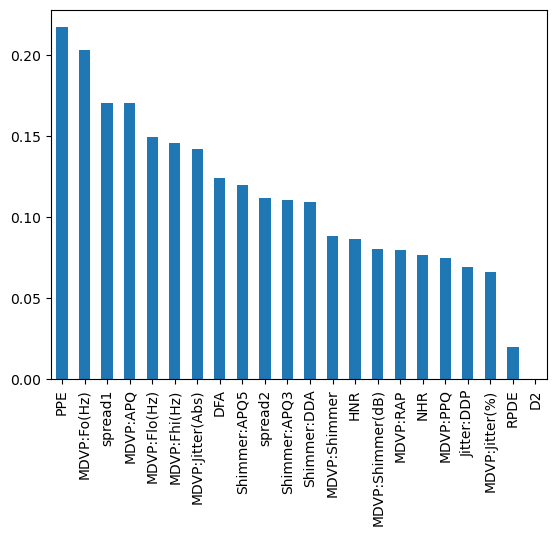

In [110]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False).plot(kind='bar')

In [111]:
sel_cols=SelectKBest(mutual_info_classif,k=12)
sel_cols.fit(X_train,y_train)

SelectKBest(k=12, score_func=<function mutual_info_classif at 0x79d41360d000>)

In [112]:
X_train.columns[sel_cols.get_support()]

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'DFA',
       'spread1', 'spread2', 'PPE'],
      dtype='object')

## Scale the data using a standardScaler

In [113]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

## ML models :

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

#ERROR METRICS 
from sklearn.metrics import f1_score,precision_score, recall_score,accuracy_score
from sklearn.metrics import average_precision_score,cohen_kappa_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [115]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Cross validation scores

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
def error_metric(y_test,y_pred):
    # Calculate error metric scores
    #F2-Score 
    #AUC-ROC
    accuracy=accuracy_score(y_test,y_pred)
    avg_precision_score=average_precision_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    cohen_kappa=cohen_kappa_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    print('Accuracy score:',accuracy)
    print('Average Precision score:',avg_precision_score)
    print('Precision:',precision)
    print('Recall:',recall)
    print("F1 Score:", f1)
    print("Cohen Kappa score:", cohen_kappa)
    print("AUC-ROC Score:", auc_roc)
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_roc)
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random classifier
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show();
    


In [118]:
def conf(model,test,pred):
    
    # Display confusion matrix
    cm = confusion_matrix(test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model.classes_)

    disp.plot()
    plt.show()



## Logistic Regression

Cross validation score: 0.8316666666666667


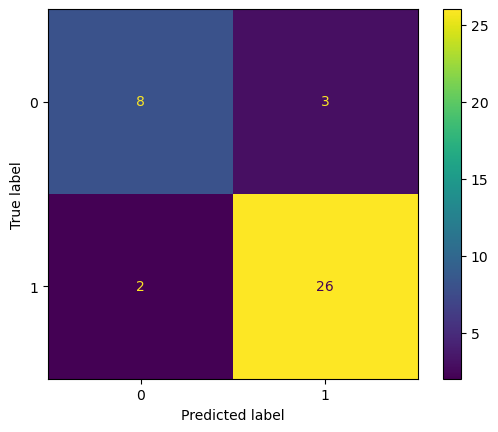

Accuracy score: 0.8717948717948718
Average Precision score: 0.8837943665529873
Precision: 0.896551724137931
Recall: 0.9285714285714286
F1 Score: 0.912280701754386
Cohen Kappa score: 0.674457429048414
AUC-ROC Score: 0.827922077922078


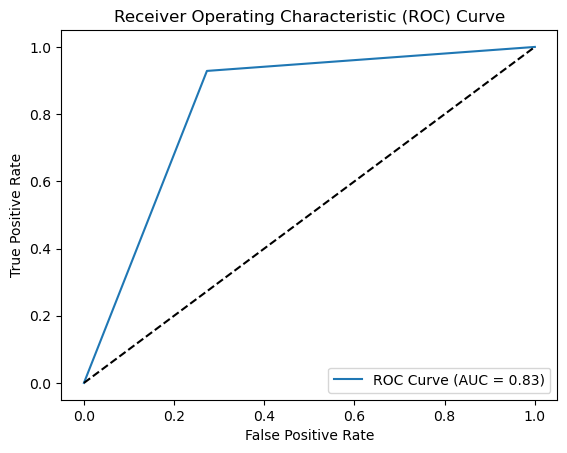

In [119]:
lr = LogisticRegression(random_state=101)
lr.fit(scaled_X_train, y_train)
cv_lr = cross_val_score(lr,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_lr.mean())

y_pred_lr = lr.predict(scaled_X_test);
conf(lr,y_test,y_pred_lr);
error_metric(y_test,y_pred_lr);


## Bernoulli Naive Bayes 

Cross validation score: 0.7170833333333333


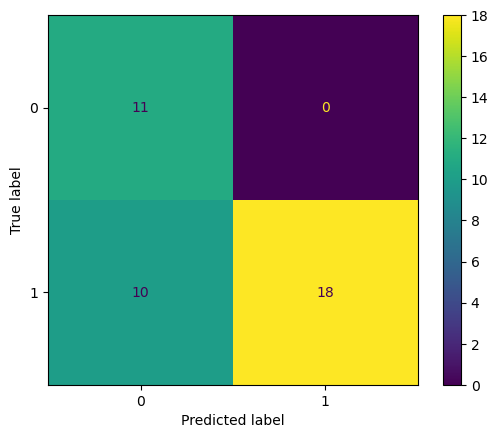

Accuracy score: 0.7435897435897436
Average Precision score: 0.8992673992673993
Precision: 1.0
Recall: 0.6428571428571429
F1 Score: 0.782608695652174
Cohen Kappa score: 0.5038167938931297
AUC-ROC Score: 0.8214285714285714


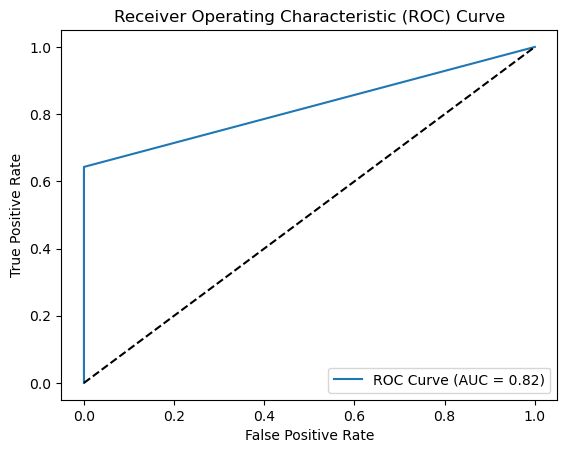

In [120]:
bnb = BernoulliNB();
bnb.fit(scaled_X_train, y_train)
cv_bnb = cross_val_score(bnb,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_bnb.mean())

y_pred_bnb = bnb.predict(scaled_X_test);
conf(bnb,y_test,y_pred_bnb);
error_metric(y_test,y_pred_bnb);


## Decision Tree

Cross validation score: 0.8329166666666667


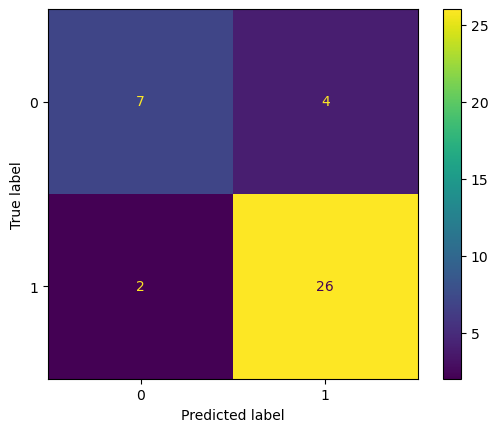

Accuracy score: 0.8461538461538461
Average Precision score: 0.856043956043956
Precision: 0.8666666666666667
Recall: 0.9285714285714286
F1 Score: 0.896551724137931
Cohen Kappa score: 0.5979381443298969
AUC-ROC Score: 0.7824675324675325


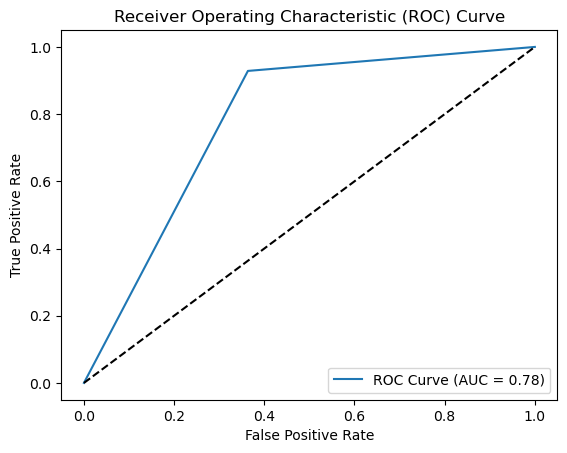

In [121]:
dt = DecisionTreeClassifier(random_state=101)
dt.fit(scaled_X_train, y_train)
cv_dt = cross_val_score(dt,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_dt.mean())


y_pred_dt = dt.predict(scaled_X_test);
conf(dt,y_test,y_pred_dt);
error_metric(y_test,y_pred_dt);

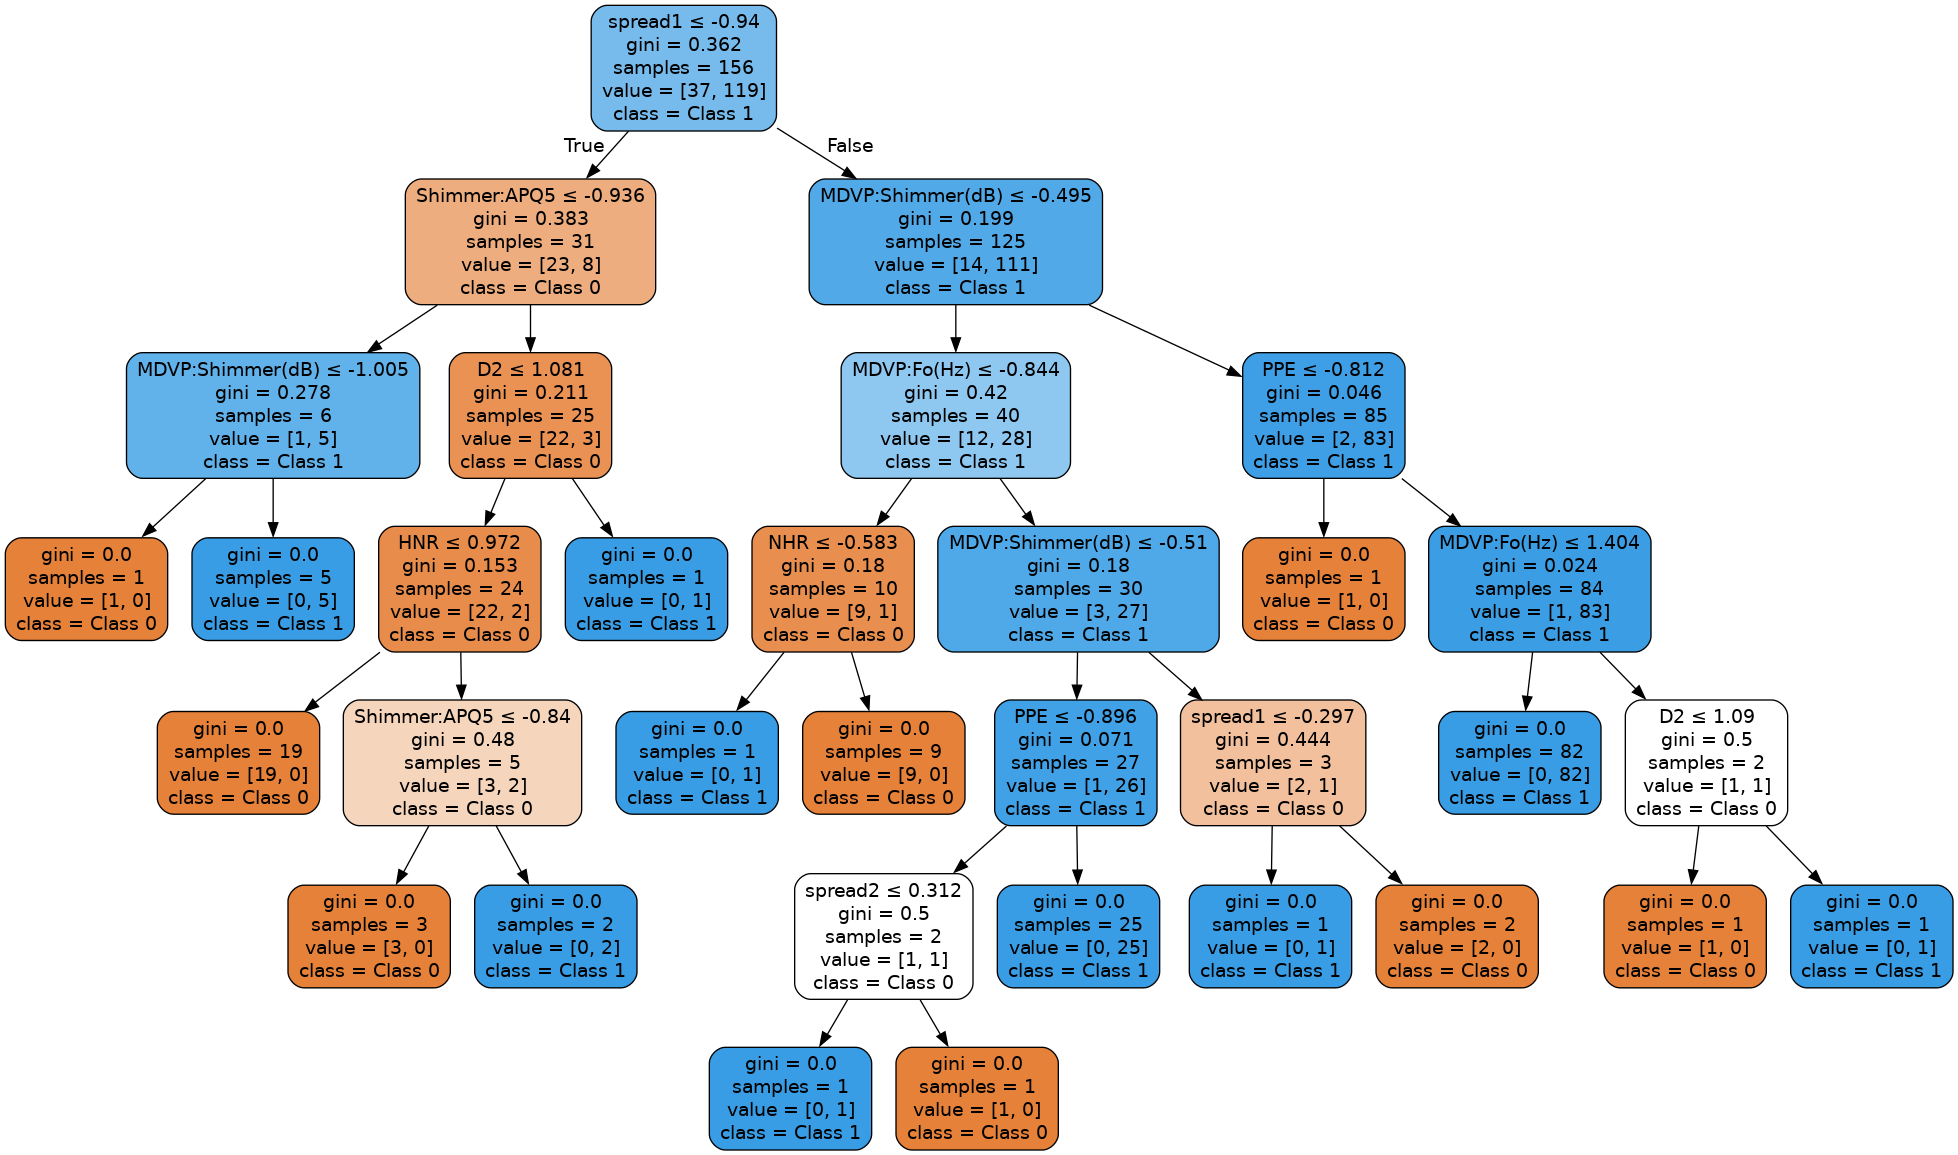

In [122]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Parkinson_File = open('parkinson.dot','w')
dot_data = tree.export_graphviz(dt,out_file=Parkinson_File, feature_names = list(X_train),class_names=['Class 0', 'Class 1'],
                                filled=True, rounded=True,
                                special_characters=True)

Parkinson_File.close()

system("dot -Tpng parkinson.dot -o parkinson.png")
Image("parkinson.png")

## Random Forest

Cross validation score: 0.8895833333333334


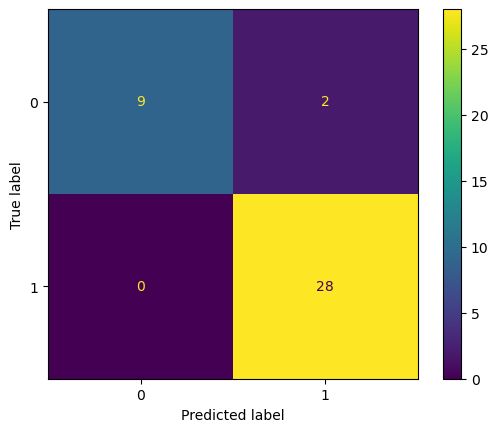

Accuracy score: 0.9487179487179487
Average Precision score: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 1.0
F1 Score: 0.9655172413793104
Cohen Kappa score: 0.865979381443299
AUC-ROC Score: 0.9090909090909091


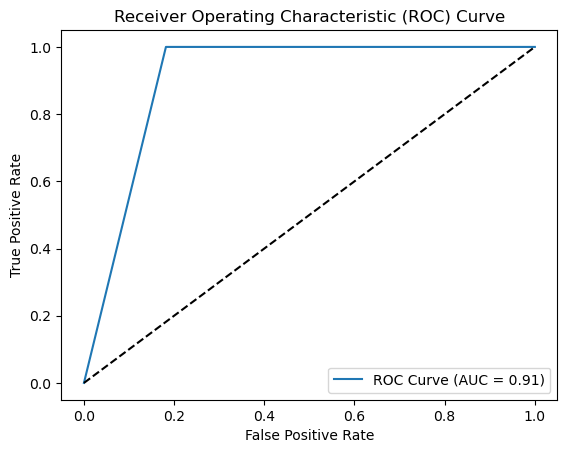

In [123]:
rfc = RandomForestClassifier(random_state=101)

rfc.fit(scaled_X_train, y_train)
cv_rfc = cross_val_score(rfc,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_rfc.mean())


y_pred_rfc = rfc.predict(scaled_X_test);
conf(rfc,y_test,y_pred_rfc);
error_metric(y_test,y_pred_rfc);



## Gradient Boosting

Cross validation score: 0.9220833333333334


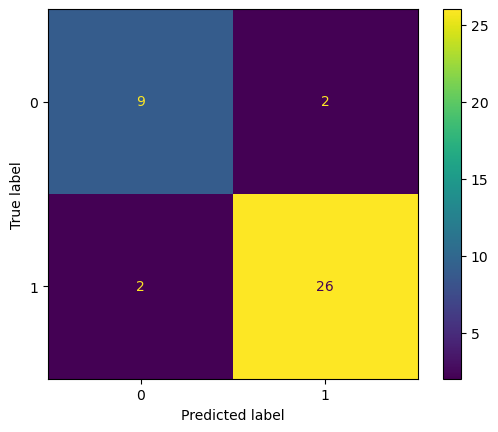

Accuracy score: 0.8974358974358975
Average Precision score: 0.9135269492412349
Precision: 0.9285714285714286
Recall: 0.9285714285714286
F1 Score: 0.9285714285714286
Cohen Kappa score: 0.7467532467532467
AUC-ROC Score: 0.8733766233766233


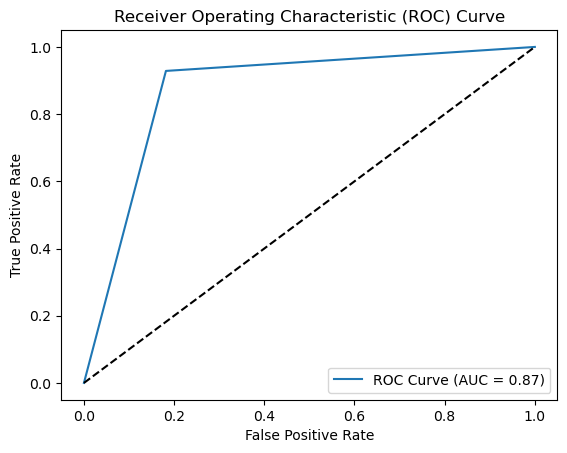

In [124]:
gbc=GradientBoostingClassifier(random_state=101)
gbc.fit(scaled_X_train, y_train)
cv_gbc = cross_val_score(gbc,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_gbc.mean())

y_pred_gbc = gbc.predict(scaled_X_test);
conf(gbc,y_test,y_pred_gbc);
error_metric(y_test,y_pred_gbc);

## XGB Classifier 

Cross validation score: 0.9354166666666668


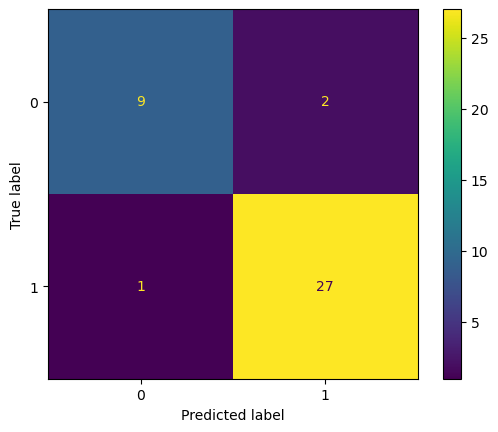

Accuracy score: 0.9230769230769231
Average Precision score: 0.9234242768725528
Precision: 0.9310344827586207
Recall: 0.9642857142857143
F1 Score: 0.9473684210526316
Cohen Kappa score: 0.8046744574290484
AUC-ROC Score: 0.8912337662337663


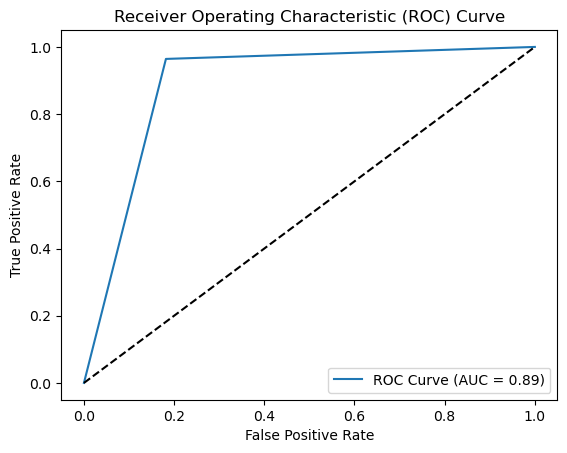

In [125]:
xgc = XGBClassifier(random_state=101)

xgc.fit(scaled_X_train, y_train)
cv_xgc = cross_val_score(xgc,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_xgc.mean())

y_pred_xgc = xgc.predict(scaled_X_test);
conf(xgc,y_test,y_pred_xgc);
error_metric(y_test,y_pred_xgc);

## ADA Boost

Cross validation score: 0.9095833333333333


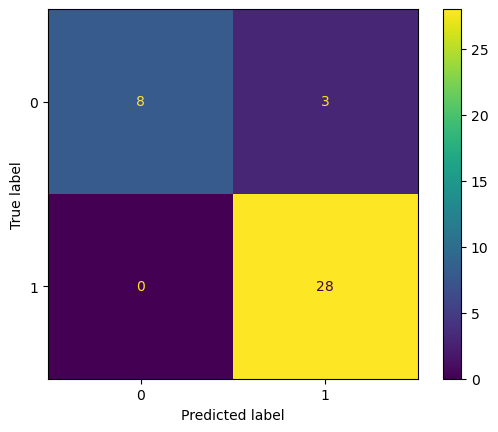

Accuracy score: 0.9230769230769231
Average Precision score: 0.9032258064516129
Precision: 0.9032258064516129
Recall: 1.0
F1 Score: 0.9491525423728813
Cohen Kappa score: 0.7929203539823009
AUC-ROC Score: 0.8636363636363636


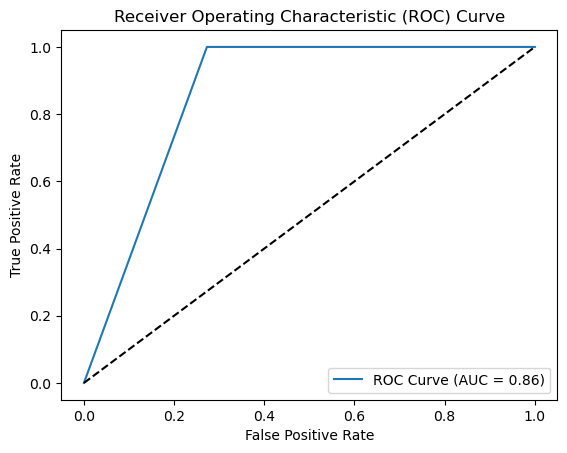

In [126]:
ada = AdaBoostClassifier(random_state=101)


ada.fit(scaled_X_train, y_train)
cv_ada = cross_val_score(ada,scaled_X_train,y_train,cv=10)
print("Cross validation score:", cv_ada.mean())

y_pred_ada = ada.predict(scaled_X_test);
conf(ada,y_test,y_pred_ada);
error_metric(y_test,y_pred_ada);


## Comparing the AUC ROC scores of the model

In [127]:
classifiers = pd.Series([ 'Logistic',  'Bernoulli Naive Bayes','DecisionTree','RandomForest','GradientBoosting','XGBoost', 'AdaBoost'])
score = pd.Series([roc_auc_score(y_test, y_pred_lr),roc_auc_score(y_test, y_pred_bnb),roc_auc_score(y_test, y_pred_dt),
         roc_auc_score(y_test, y_pred_rfc),roc_auc_score(y_test, y_pred_gbc),roc_auc_score(y_test, y_pred_xgc),roc_auc_score(y_test, y_pred_ada)])

accuracy_=pd.Series([accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_bnb),accuracy_score(y_test, y_pred_dt),
         accuracy_score(y_test, y_pred_rfc),accuracy_score(y_test, y_pred_gbc),accuracy_score(y_test, y_pred_xgc),accuracy_score(y_test, y_pred_ada)])

precision_=pd.Series([precision_score(y_test, y_pred_lr),precision_score(y_test, y_pred_bnb),precision_score(y_test, y_pred_dt),
         precision_score(y_test, y_pred_rfc),precision_score(y_test, y_pred_gbc),precision_score(y_test, y_pred_xgc),precision_score(y_test, y_pred_ada)])

recall_=pd.Series([recall_score(y_test, y_pred_lr),recall_score(y_test, y_pred_bnb),recall_score(y_test, y_pred_dt),
         recall_score(y_test, y_pred_rfc),recall_score(y_test, y_pred_gbc),recall_score(y_test, y_pred_xgc),recall_score(y_test, y_pred_ada)])

avg_precision_=pd.Series([average_precision_score(y_test, y_pred_lr),average_precision_score(y_test, y_pred_bnb),average_precision_score(y_test, y_pred_dt),
         average_precision_score(y_test, y_pred_rfc),average_precision_score(y_test, y_pred_gbc),average_precision_score(y_test, y_pred_xgc),
                         average_precision_score(y_test, y_pred_ada)])

f1_=pd.Series([f1_score(y_test, y_pred_lr),f1_score(y_test, y_pred_bnb),f1_score(y_test, y_pred_dt),
         f1_score(y_test, y_pred_rfc),f1_score(y_test, y_pred_gbc),f1_score(y_test, y_pred_xgc),f1_score(y_test, y_pred_ada)])

cohen_kappa_=pd.Series([cohen_kappa_score(y_test, y_pred_lr),cohen_kappa_score(y_test, y_pred_bnb),cohen_kappa_score(y_test, y_pred_dt),
         cohen_kappa_score(y_test, y_pred_rfc),cohen_kappa_score(y_test, y_pred_gbc),cohen_kappa_score(y_test, y_pred_xgc),cohen_kappa_score(y_test, y_pred_ada)])


### Error metrics taken

In [128]:
pd.DataFrame({"Classifier":classifiers,'AUC ROC score':score,'Average Precision score':avg_precision_,
             'Accuracy':accuracy_,'Precision':precision_,'Recall':recall_,'Cohen Kappa score': cohen_kappa_,'F1 score':f1_})

,Classifier,AUC ROC score,Average Precision score,Accuracy,Precision,Recall,Cohen Kappa score,F1 score
0,Logistic,0.827922,0.883794,0.871795,0.896552,0.928571,0.674457,0.912281
1,Bernoulli Naive Bayes,0.821429,0.899267,0.743590,1.000000,0.642857,0.503817,0.782609
2,DecisionTree,0.782468,0.856044,0.846154,0.866667,0.928571,0.597938,0.896552
3,RandomForest,0.909091,0.933333,0.948718,0.933333,1.000000,0.865979,0.965517
4,GradientBoosting,0.873377,0.913527,0.897436,0.928571,0.928571,0.746753,0.928571
5,XGBoost,0.891234,0.923424,0.923077,0.931034,0.964286,0.804674,0.947368
6,AdaBoost,0.863636,0.903226,0.923077,0.903226,1.000000,0.792920,0.949153


In [129]:
score_eval = pd.DataFrame({"Classifier":classifiers,'AUC ROC score':score,})
score_eval.sort_values(by="AUC ROC score", ascending=False,inplace = True)
score_eval

,Classifier,AUC ROC score
3,RandomForest,0.909091
5,XGBoost,0.891234
4,GradientBoosting,0.873377
6,AdaBoost,0.863636
0,Logistic,0.827922
1,Bernoulli Naive Bayes,0.821429
2,DecisionTree,0.782468


### Implementing Threshold value on the models

Function Description
1. split():
Splits the dataset into training and test set.

2. variance_threshold():
Returns the dataframe after dropping features with lower variance than the threshold value.

3. acc_score():
Returns accuracy for all the classifiers.

4. acc_score_thr():
Returns accuracy for all the classifiers for the respective threshold value.

5. plot2():
For plotting the results.

In [130]:
from sklearn.metrics import accuracy_score

In [131]:
from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.20, random_state=42)
    return X_tr, X_te, Y_tr, Y_te


from sklearn.feature_selection import VarianceThreshold
def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

models = [LogisticRegression(random_state=101), BernoulliNB(),
          DecisionTreeClassifier(random_state=101),RandomForestClassifier(random_state=101),
          GradientBoostingClassifier(random_state=101),XGBClassifier(random_state=101),
         AdaBoostClassifier(random_state = 101)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score


def acc_score_thr(df,label,thr_list):
    Score = pd.DataFrame({"Classifier":classifiers})
    for k in range(len(thr_list)):
        df2 = variance_threshold(df,thr_list[k])
        X_train,X_test,Y_train,Y_test = split(df2,label)
        j = 0
        acc = []
        for i in models:
            model = i
            model.fit(X_train,Y_train)
            predictions = model.predict(X_test)
            acc.append(accuracy_score(Y_test,predictions))
            j = j+1  
        feat = str(thr_list[k])
        Score[feat] = acc
    return Score

def plot2(df,l1,l2,p1,p2,c = "b"):
    feat = []
    feat = df.columns.tolist()
    feat = feat[1:]
    plt.figure(figsize = (16, 18))
    for j in range(0,df.shape[0]):
        value = []
        k = 0
        for i in range(1,len(df.columns.tolist())):
            value.append(df.iloc[j][i])
        plt.subplot(4, 4,j+1)
        ax = sns.pointplot(x=feat, y=value,color = c )
        plt.text(p1,p2,df.iloc[j][0])
        plt.xticks(rotation=90)
        ax.set(ylim=(l1,l2))
        k = k+1
        
def highlight_max(data, color='aquamarine'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

In [132]:
score3 = acc_score(X,y)
score3

,Classifier,Accuracy
0,RandomForest,0.948718
1,GradientBoosting,0.948718
2,XGBoost,0.948718
3,DecisionTree,0.923077
4,Logistic,0.897436
5,AdaBoost,0.871795
6,Bernoulli Naive Bayes,0.820513


## Model results on various threshold values

In [133]:
threshold_pd = [0.05,0.01,0.005,0.001,0.0001,0.0005]
classifiers = score3["Classifier"].tolist()
score_pd = acc_score_thr(X,y,threshold_pd)
score_pd.style.apply(highlight_max, subset = score_pd.columns[1:], axis=None)

,Classifier,0.05,0.01,0.005,0.001,0.0001,0.0005
0,RandomForest,0.897436,0.871795,0.897436,0.871795,0.897436,0.871795
1,GradientBoosting,0.820513,0.820513,0.820513,0.820513,0.820513,0.820513
2,XGBoost,0.820513,0.871795,0.897436,0.923077,0.897436,0.974359
3,DecisionTree,0.897436,0.897436,0.923077,0.923077,0.923077,0.948718
4,Logistic,0.871795,0.897436,0.923077,0.948718,0.923077,0.948718
5,AdaBoost,0.897436,0.871795,0.948718,0.948718,0.948718,0.948718
6,Bernoulli Naive Bayes,0.846154,0.871795,0.871795,0.871795,0.820513,0.871795


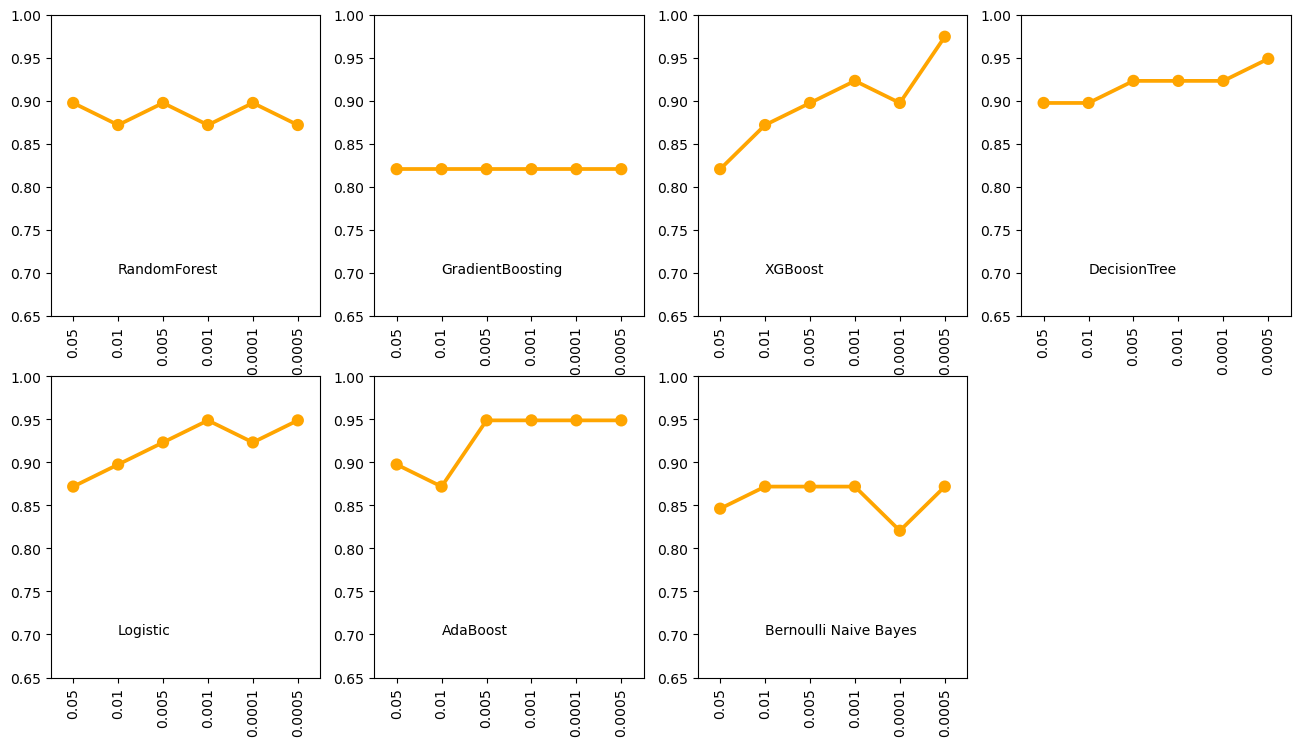

In [134]:
plot2(score_pd,0.65,1.0,1,0.7,c = "orange")

With the threshold value of 0.0005 used on XGBoost we can get a 97.4359% accuracy.
The original accuarcy of the model without feature selection is 94.8718%.

That is a 2.5641% jump in the accuracy of the model